In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import fipy
from fipy import Grid1D, CellVariable
from fipy import TransientTerm, DiffusionTerm

In [3]:
# parameters
# physics
L = 1.0
Uinit = 0.0
U_H = 1.0
U_L = 0.0
alpha = 1.0
# FVM
N = 40
dt = 0.001
Nt = 100

In [4]:
# define mesh
w = L/N
msh = Grid1D(dx=w, nx=N)

In [5]:
xcc = msh.cellCenters.value[0]

In [6]:
# define cell variable

In [7]:
u = CellVariable(mesh=msh, value=Uinit)

In [8]:
uval = u.value

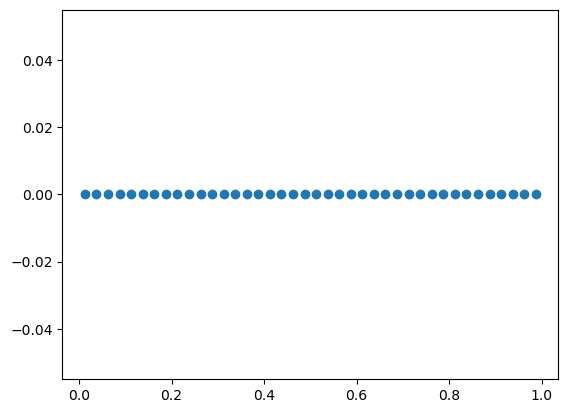

In [9]:
plt.plot(xcc, uval, 'o')

In [10]:
# define BC
# default NO FLUX
pass

In [11]:
# define IC
uval[xcc < L/2] = U_H
uval[xcc >= L/2] = U_L

Text(0.5, 0, 'x')

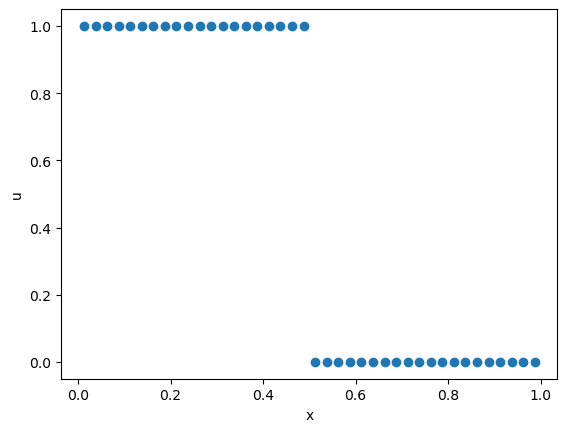

In [12]:
plt.plot(xcc, uval, 'o')
plt.ylabel('u')
plt.xlabel('x')

In [13]:
np.sum(uval * w)

0.5

In [14]:
# define PDE
eqn   = TransientTerm(var=u) == DiffusionTerm(var=u, coeff=alpha)

Text(0.5, 0, 'x')

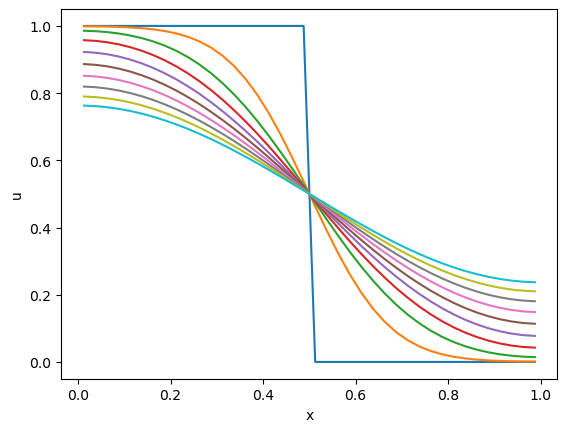

In [15]:
# solve equation (and sample solution)
u0 = np.zeros(Nt)
tt = np.arange(Nt) * dt
for n in range(Nt):
    u0[n] = uval[0]
    if n%10==0:
        plt.plot(xcc, uval)
    eqn.solve(dt=dt)
plt.ylabel('u')
plt.xlabel('x')

In [16]:
np.sum(uval * w)

0.5000000000000202

Text(0.5, 0, 't')

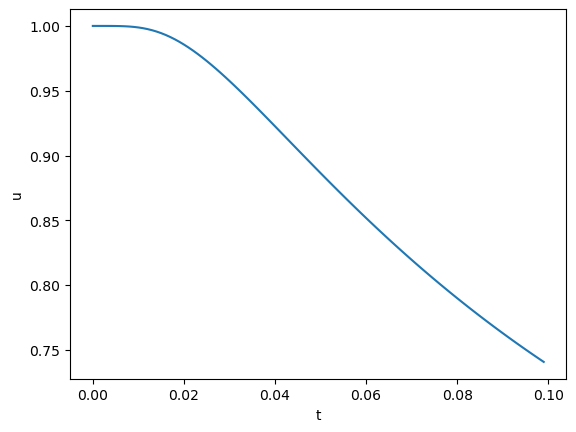

In [17]:
plt.plot(tt, u0)
plt.ylabel('u')
plt.xlabel('t')